In [1]:

import math
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

# Load, convert Amtrak data for time series analysis
Amtrak_df = pd.read_csv('Amtrak.csv')

In [2]:
Amtrak_df.head()

,Month,Ridership
0,01/01/1991,1708.917
1,01/02/1991,1620.586
2,01/03/1991,1972.715
3,01/04/1991,1811.665
4,01/05/1991,1974.964


In [3]:
print(Amtrak_df)

          Month  Ridership
0    01/01/1991   1708.917
1    01/02/1991   1620.586
2    01/03/1991   1972.715
3    01/04/1991   1811.665
4    01/05/1991   1974.964
..          ...        ...
154  01/11/2003   2076.054
155  01/12/2003   2140.677
156  01/01/2004   1831.508
157  01/02/2004   1838.006
158  01/03/2004   2132.446

[159 rows x 2 columns]


In [4]:
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.head(9)

,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
5,01/06/1991,1862.356,1991-06-01
6,01/07/1991,1939.860,1991-07-01
7,01/08/1991,2013.264,1991-08-01
8,01/09/1991,1595.657,1991-09-01


In [5]:
# load data and convert to time series

ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)

Text(0, 0.5, 'Ridership (in 000s)')

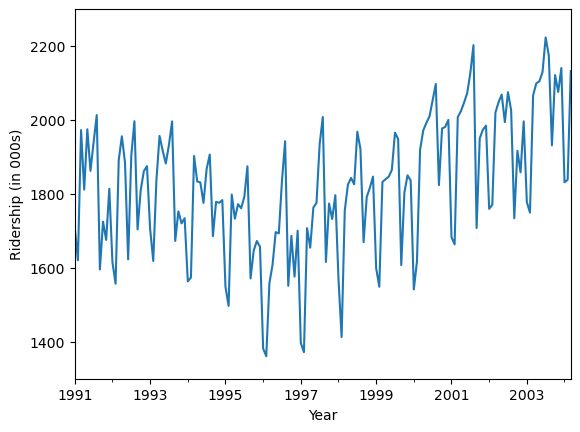

In [6]:
# Pandas Version
ridership_ts.plot(ylim=[1300, 2300], legend=False)
plt.xlabel('Year'); plt.ylabel('Ridership (in 000s)')

In [8]:
Amtrak_df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Month      159 non-null    object        
 1   Ridership  159 non-null    float64       
 2   Date       159 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.9+ KB


In [17]:
import pandas as pd

# Load the DataFrame from a file
df = pd.read_csv('Amtrak.csv')

# Get the list of column names
column_names = list(df.columns)

# Print the list of column names
print(column_names)


['Month', 'Ridership']


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      159 non-null    object 
 1   Ridership  159 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [21]:
df['Date'] = pd.to_datetime(df.Month, format='%d/%m/%Y')
df = df.set_index('Date')
df.head(9)

,Month,Ridership
Date,,
1991-01-01,01/01/1991,1708.917
1991-02-01,01/02/1991,1620.586
1991-03-01,01/03/1991,1972.715
1991-04-01,01/04/1991,1811.665
1991-05-01,01/05/1991,1974.964
1991-06-01,01/06/1991,1862.356
1991-07-01,01/07/1991,1939.860
1991-08-01,01/08/1991,2013.264
1991-09-01,01/09/1991,1595.657


In [32]:
# Fit the linear trend model
import statsmodels.formula.api as smf
df['trend'] = range(1, len(df) + 1)
model = smf.ols('Ridership ~ trend', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     32.92
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           4.80e-08
Time:                        21:06:49   Log-Likelihood:                -1037.1
No. Observations:                 159   AIC:                             2078.
Df Residuals:                     157   BIC:                             2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1690.7983     26.401     64.042      0.0

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = df.drop(['Ridership','Month'], axis=1)
y = df['Ridership']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
from sklearn.linear_model import LinearRegression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_valid)

In [43]:
print(y_pred)

[1811.3656943  1943.98419769 1897.48160559 1771.75237511 1838.92278592
 1726.97210124 1930.20565188 1764.86310221 1845.81205882 1919.87174253
 1709.74891898 1780.36396624 1702.85964608 1788.97555737 1718.36051011
 1728.69441947 1894.03696914 1850.9790135  1842.36742237 1704.58196431
 1937.09492478 1708.02660076 1697.6926914  1692.52573673 1730.41673769
 1892.31465091 1840.64510414 1773.47469334 1926.76101543 1938.81724301
 1909.53783317 1807.92105785]
